<center><h3> Major League Baseball-Data Analysis for salaries of Players for UK team

<font size = 2><b>Import Required Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
%matplotlib inline 
sns.set(context="notebook",style="white",palette="dark")
plt.style.use('ggplot')

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

<font size = 2><b>Read the dataset

In [20]:
df = pd.read_csv("mlb.csv")
print(df.shape)
df.head(8)

(352, 21)


,salary,player_position,race,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,...,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
0,3375000,shortstop,black,38407380,8,918,3333,407,863,156,...,73,342,259,137,582,133,968,70.27797,18.84423,10.8778
1,3100000,firstbase,white,38407380,5,751,2807,370,840,148,...,46,355,299,341,228,41,994,70.27797,18.84423,10.8778
2,2900000,thirdbase,white,38407380,8,1056,3337,405,816,143,...,107,421,245,306,653,15,971,70.27797,18.84423,10.8778
3,1650000,outfield,black,38407380,12,1196,3603,437,928,19,...,124,541,258,316,725,32,977,70.27797,18.84423,10.8778
4,700000,outfield,black,38407380,17,2032,7489,1136,2145,270,...,40,574,286,416,1098,660,987,70.27797,18.84423,10.8778
5,695000,outfield,hispanic,38407380,4,394,1293,179,303,51,...,37,141,234,77,358,67,965,70.27797,18.84423,10.8778
6,275000,catcher,white,38407380,10,432,1005,78,240,35,...,13,95,239,39,140,1,990,70.27797,18.84423,10.8778
7,235000,shortstop,hispanic,38407380,4,223,491,37,118,16,...,1,29,240,23,62,6,963,70.27797,18.84423,10.8778


<font size = 4><b> Dealing with missing values.

In [21]:
#The features with missing values
total = df.isnull().sum().sort_values(ascending=False)
missing_data = pd.DataFrame(total, columns = ["Missing Values"])
missing_data.head()

,Missing Values
hispanic_percent_in_city,23
black_percent_in_city,23
white_percent_in_city,23
career_homeruns,0
career_fielding_percent,0


__Inference:__ The __"hispanic_percent_in_city", "white_percent_in_city", "black_percent_in_city"__ features have 23 missing values, which needs to be filled. We will create an array that contains random numbers, which are calculated based on the mean value of each feature in regards to the standard deviation and is_null.

In [22]:
## features with missing values
df1 = df[["hispanic_percent_in_city", "black_percent_in_city", "white_percent_in_city"]]
for feature in df1:
    mean = df[feature].mean()
    std = df[feature].std()
    is_null = df[feature].isnull().sum()
    # Get random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in each feature column with random values generated
    feature_slice = df[feature].copy()
    feature_slice[np.isnan(feature_slice)] = rand_age
    df[feature] = feature_slice
##Check if any column still contain missing values
df[feature].isnull().sum()

0

<font size = 4><b> Descriptive statistics 

A great way to start descriptive analysis is by simply looking at what kind of ranges each feature has and how much they vary around their average values.

In [23]:
# Pandas describe function to get statistical insights of numerical data.
df.iloc[:,0:10].describe().T.style.background_gradient(cmap='Set2',low =0.4,high=0.1,axis=0)

,count,mean,std,min,25%,50%,75%,max
salary,352.000000,1331514.463068,1383952.340063,109000.000000,252700.000000,675000.000000,2250000.000000,6200000.000000
team_payroll,352.000000,30773198.946023,8725344.257746,8854000.000000,24557332.000000,34136500.000000,37792000.000000,42866000.000000
years_played,352.000000,6.309659,3.873810,1.000000,3.000000,6.000000,9.000000,20.000000
games_played,352.000000,645.423295,536.499990,7.000000,230.000000,518.500000,930.000000,2729.000000
career_at_bats,352.000000,2155.704545,2013.393716,7.000000,631.500000,1583.000000,3026.000000,10554.000000
career_runs,352.000000,288.170455,298.500277,1.000000,73.000000,190.500000,405.500000,1570.000000
career_hits,352.000000,580.889205,571.632472,1.000000,163.000000,416.000000,817.250000,3025.000000
career_doubles,352.000000,103.267045,103.831374,0.000000,26.000000,70.000000,146.250000,634.000000


__Inference:__ \
This instantly provide us some information about the average salary of players in dataset. We can see that, on average, player earns __1.33 GBP annually__ annualy.While, the __maximum salary__ of any player is __6.2 million GBP.__

<font size = 4><B> Descriptive Analysis using Visualisation


Now, We need to check, do Black and White Players have difference in average salary? To get this insight, we will use  Boxplots.

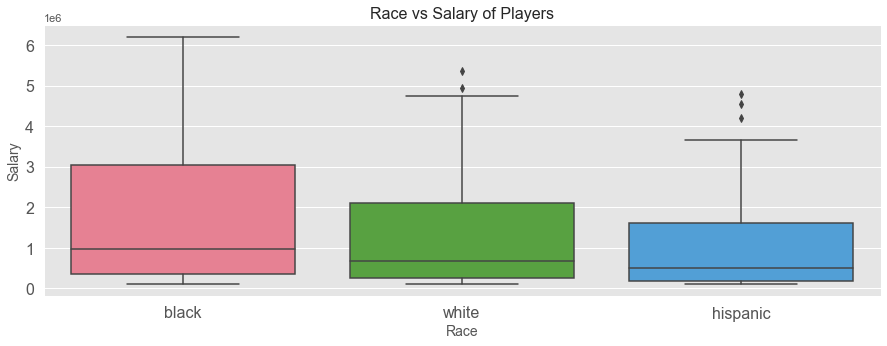

In [24]:
def race_vs_salary():
    
    """"
    Developing scatterplot using seaborn with Race on x-axis and 
    salar on y-axis
    """
    fig=plt.figure(figsize=(15,5))

    sns.boxplot(x="race", y="salary", data=df, palette="husl")
    plt.xlabel("Race",fontsize=14)
    plt.ylabel("Salary",fontsize=14)
    ## set font size of x and y axis
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.title("Race vs Salary of Players",fontsize=16)
race_vs_salary()

<font size = 2>__Inference:__ It gives an interesting insight that black players on average have higher salaries while Hispanic Playes have the lowest salaries in our data.

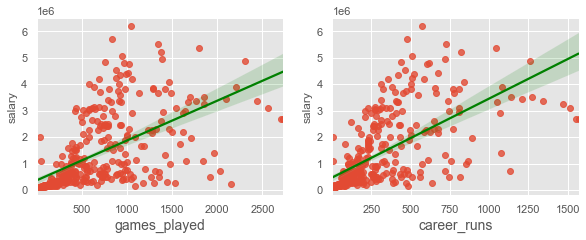

In [7]:
def regplot():
    """"
    Developing regplot using seaborn with to viualize the correlation of salary with number
    of games played and career runs of players. We'll use the for loop to select each on x-axis variable to plot
    against the salary on y-axis
    """
    fig=plt.figure(figsize=(15,15))

    for e, column in enumerate(["games_played", "career_runs"]):
        plt.subplot(4, 3, e + 1)
        plt.xlabel(column, fontsize = 14)
        sns.regplot( data= df, x=column, y='salary', line_kws={"color": "green"})
regplot()       

__Inference:__ From the above graphs, we can depict that each of them games_played, career_hits and career_runs have positive linear relationship with the salary of Players. So, these three features will be very important in developing Regression Model for predictive analysis.
    

<font size = 4><b>Distribution of numerical variables.

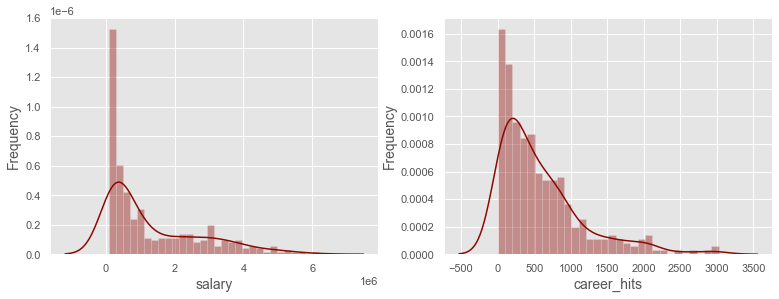

In [29]:
def histplot(feature_1, feature_2):   
    
    """
    Histogram to show the distribution of features in our data
    
    
    """
    plt.figure(figsize=(20, 20))

    for e, column in enumerate([feature_1,feature_2]):
        plt.subplot(4, 3, e + 1)
        sns.distplot(df[column],bins=30,color="r")
        
        ## set font size of x and y axis
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Frequency' , fontsize=14)
histplot('salary','career_hits')

__Inference:__
* We can observe that salary of players has not uniform distribution. It means that salary largely varies for different player and majority of players have __less than avaerge salary(1.33 million GPB)__ in our data.
* From the plot,it is understood that there is an increasing trend of salary for players with higher career_hits. It makes an obvious sense that players with higher than average perfomance earns the highest salaries. Both of these plots are right skewed.

In [10]:
by_year = df.groupby("player_position")["salary"].mean()
by_year

player_position
catcher       8.925192e+05
firstbase     1.586781e+06
outfield      1.539324e+06
secondbase    1.170208e+06
shortstop     1.069211e+06
thirdbase     1.382647e+06
Name: salary, dtype: float64

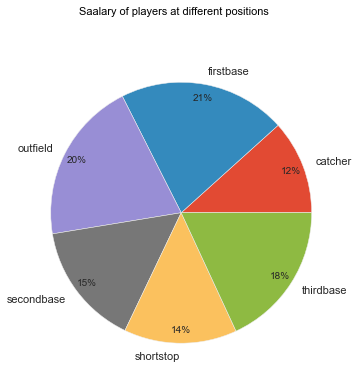

In [11]:
def pie_chart(feature, label):
    
    """
    Pie-chart to plot the percentage salary of players at different positions
    """
    
    fig, ax  = plt.subplots(figsize=(8, 6))
    fig.suptitle('Saalary of players at different positions', size = 11, color = "black")
    ax = plt.pie(feature, labels=label, 
           autopct='%1.0f%%',
           pctdistance=0.9)
pie_chart(by_year, by_year.index)

<font size = 5><b> <center>THE END